# Springboard Mini-Projects: EDA 2 - Racial Discrimination
## By: AJ Goldstein (https://github.com/ajva1996)

## <span style="color:red"> Examining Racial Discrimination in the US Job Market: </span>
## <span style="color:red"> Does race have a significant impact on the rate of callbacks for resumes? </span>

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [70]:
from __future__ import division
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')
%matplotlib inline

## Read in data

In [71]:
# read in data
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [72]:
# narrow down to columns of interest
data = pd.concat([data.race,data.call], axis=1)
print('sample size =',len(data))
data.head()

('sample size =', 4870)


,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


## Generate quick high-level graph

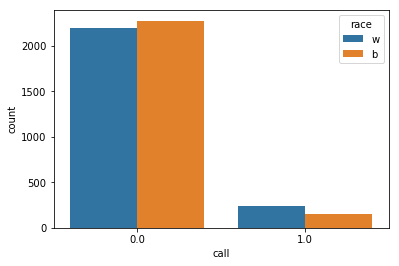

In [73]:
# countplot of callbacks for black & white-sounding names
sns.countplot(x=data.call, hue=data.race)

### QUESTION #1: What test is appropriate for this problem? Does CLT apply?

### <span style="color:red"> ANSWER #1:</span>
<ul>
    <li><span style="color:red"><b>Two-sample t-test</b> is appropiate because we are trying to determine if two population means are equal.</span></li>
    <li> <span style="color:red"><b>CLT applies</b> because our sample size is large (n = 4870) and observations are independent. </span></li>

### QUESTION #2: What are the null and alternate hypotheses?

### <span style="color:red"> ANSWER #2:</span>
<ul>
    <li><span style="color:red"><b>Null Hypothesis:</b> the mean difference between callback rate for black & white-sounding names is zero</span></li>
    <li> <span style="color:red"><b>Alternative Hypothesis:</b> there is a significant (non-zero) difference between callback rate for black & white-sounding names</span></li>

### QUESTION #3: Compute margin of error, confidence interval, and p-value.

In [74]:
# calculate statistics for binomial distributions
n1 = len(data[data['race'] == 'b']) # black sample size
n2 = len(data[data['race'] == 'w']) # white sample size
p1 = sum(data[data['race'] == 'b'].call)/n1 # black callback rate
p2 = sum(data[data['race'] == 'w'].call)/n2 # white callback rate

In [75]:
# conduct two-sample t-test
p_hat = (n1*p1+n2*p2)/(n1+n2) # joint callback
std_hat = math.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2))) # joint standard deviation

test_stat = (p1-p2)/std_hat
p_val = stats.t.sf(abs(test_stat), df=len(data)-1)*2

print('test statistic:',test_stat)
print('p value:',p_val)

('test statistic:', -4.1084121524343464)
('p value:', 4.0493178875903686e-05)


In [76]:
# calculate margins of error for the two distributions
stderr1 = math.sqrt((p1*(1-p1))/n1) # black standard error
stderr2 = math.sqrt((p2*(1-p2))/n2) # white standard error
stderr_diff = math.sqrt(math.pow(stderr1,2) + math.pow(stderr2,2)) # standard error for difference

# calculate confidence interval for difference in the distributions
conf_int_lower = abs(p1-p2)-1.96*stderr_diff
conf_int_upper = abs(p1-p2)+1.96*stderr_diff
conf_int = [conf_int_lower,conf_int_upper]

print('confidence interval for the difference of black & white callback rate:')
print(conf_int)

confidence interval for the difference of black & white callback rate:
[0.016777447859559147, 0.047288260559332024]


### <span style="color:red">ANSWER #3:</span>
### <span style="color:red">The p-value = 4.04 e-5 and 95% confidence interval = [0.017, 0.047] for the difference between the two proportions. </span>

### QUESTION #4: Write a story describing the statistical significance in the context of the original problem.

### <span style="color:red">ANSWER #4:</span>
### <span style="color:red">With a p-value of less than 0.05 and confidence interval that does not contain 0, we can conclude that there is a statistically significant difference between callback rates for black and white-sounding names.</span>

### QUESTION #5: Does the analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

### <span style="color:red">ANSWER #5:</span>
### <span style="color:red">No, the conclusion above does not imply that race is the most important factor in callback success, because it solely examines race. All other relevant factors like education and years of experience would need to be examined and compared in order to identify the *most important* one.</span>